<a href="https://colab.research.google.com/github/Mr-Abhinav/Titanic/blob/main/_Project__Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

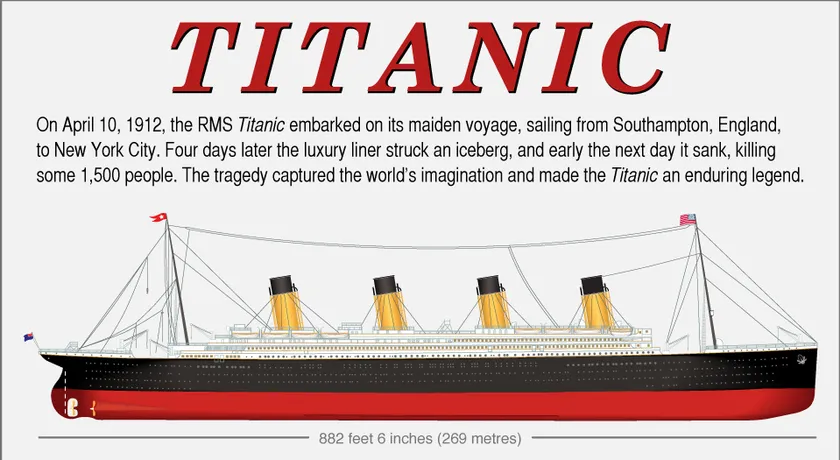







In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [ ]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Train.csv")

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Survival** -	Survival 	0 = No, 1 = Yes

**Pclass** -	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

**Sex** - 	Sex

**Age** - 	Age in years

**SibSp** - 	of siblings / spouses aboard the Titanic

**Parch** - 	of parents / children aboard the Titanic

**Ticket** - 	Ticket number

**Fare** - 	Passenger fare

**Cabin** - 	Cabin number

**Embarked** - 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton




In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Null values through heatmap')

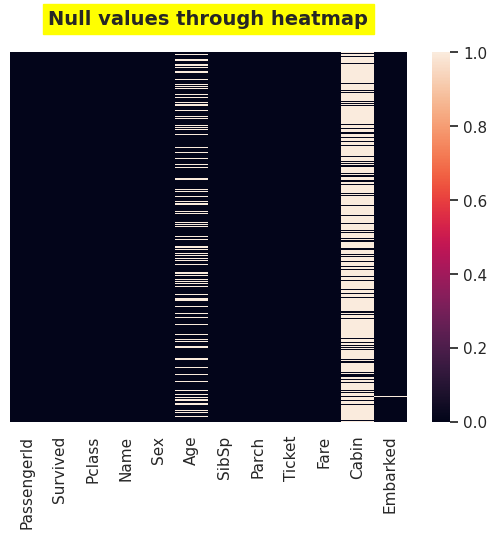

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=True).set_title("Null values through heatmap",size=14,fontweight="bold",backgroundcolor="yellow",pad=20)  #As we can see from the diagram the column ‘Age’ and ‘Cabin’ have got null values. While ‘Cabin’ has huge amount null values, ‘Age’ has moderate amount of null values.

In [ ]:
Train_df= titanic_df # Copy the orginal data

In [ ]:
Train_df[Train_df.duplicated()].shape              # Show no. of rows of duplicate rows duplicate rows

(0, 12)

In [ ]:
Train_df.shape                                # Get the shape of dataframe

(891, 12)

In [ ]:
Train_df.isnull().sum().sort_values(ascending = False)[:6]              # Checking if all null values


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
dtype: int64

In [ ]:
Train_df.drop(["PassengerId",'Ticket'],axis = 1,inplace = True) # PassengerId and ticket columns not relevent to survive then drop down the columns

In [ ]:
Train_df[['Cabin','Age','Fare','Embarked']] = Train_df[['Cabin','Age','Fare','Embarked']].fillna(0)               # We will replace null values by 0 in these columns

In [ ]:
Train_df.isnull().sum().sort_values(ascending = False)[:6] # No null values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
dtype: int64

Text(0.5, 1.0, 'Missing values through heatmap')

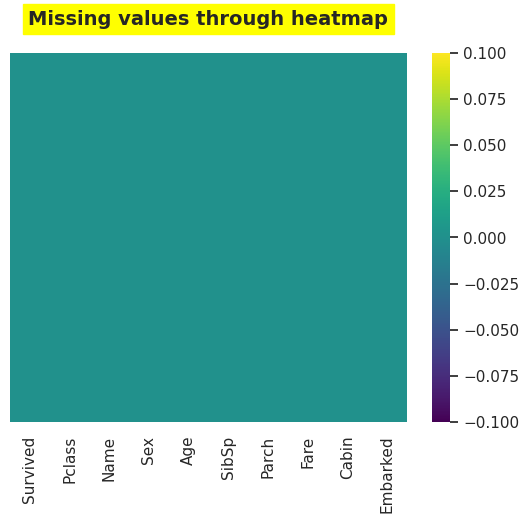

In [ ]:
Train_df.isnull().sum() # Check the missing values

sns.heatmap(Train_df.isnull(), cbar = True,cmap='viridis', yticklabels=False).set_title("Missing values through heatmap", size=14,fontweight="bold",backgroundcolor="yellow",pad=20)

# **Numirical values**

In [ ]:
numirical_columns = [f for f in Train_df.columns if Train_df.dtypes[f] != 'object']
numirical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# **Categorical values**

In [ ]:
categorical_columns = [f for f in Train_df.columns if Train_df.dtypes[f] == 'object']
categorical_columns

['Name', 'Sex', 'Cabin', 'Embarked']

# **Convert Float vlaues into Integer**

In [ ]:
Train_df[['Age', 'Fare']] = Train_df[['Age', 'Fare']].astype('int64')

# Unique vlaues


In [ ]:
Train_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          71
SibSp         7
Parch         7
Fare         91
Cabin       148
Embarked      4
dtype: int64

In [ ]:
Train_df['Cabin'].unique()


array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [ ]:
Train_df['Cabin'].fillna('others', inplace = True)

In [ ]:
a = Train_df['Pclass'].unique()
a.sort()
print(a)

[1 2 3]


In [ ]:
b= Train_df['Age'].unique()                         # Age between 0 to 80 years
b.sort()
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 70 71 74 80]


# **Survive**

In [ ]:
Train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.783389,0.523008,0.381594,31.785634
std,0.486592,0.836071,17.597344,1.102743,0.806057,49.703730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


**In the training set:**


*   38.3% people survived
*  There were more people in third class.
*   The majority of the passengers ranged in age from 20 to 38.
*  Survival rate is 0.38 only






In [ ]:
Train_df.loc[Train_df['Fare'].idxmin()]

Survived                      0
Pclass                        3
Name        Leonard, Mr. Lionel
Sex                        male
Age                          36
SibSp                         0
Parch                         0
Fare                          0
Cabin                         0
Embarked                      S
Name: 179, dtype: object

In [ ]:
print((Train_df['Sex']=='female').sum())

314


In [ ]:
Train_df.loc[Train_df['Fare'].idxmax()]

Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                       35
SibSp                      0
Parch                      0
Fare                     512
Cabin                      0
Embarked                   C
Name: 258, dtype: object

In [ ]:
print((Train_df['Survived']==1).sum()) # Survive
print((Train_df['Survived']==0).sum()) # Perished

342
549


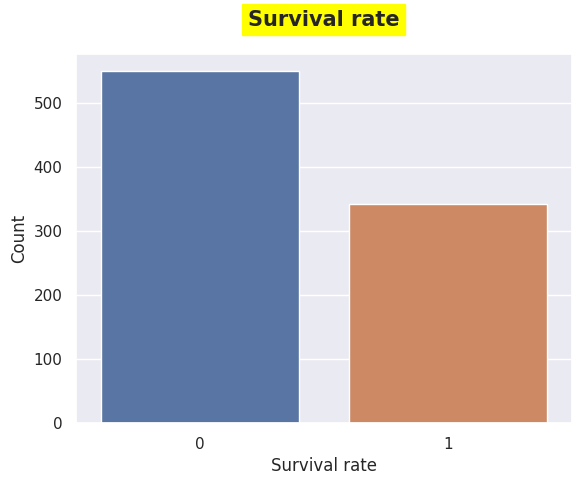

In [ ]:
sns.countplot(x= 'Survived', data = Train_df)
plt.ylabel('Count')
plt.xlabel('Survival rate')
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)
plt.show()

# **Analysis Survival rate gender wise**

In [ ]:
Train_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

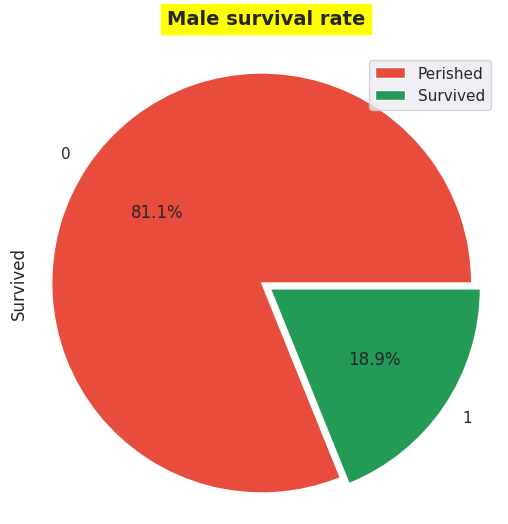

In [ ]:
colors = ['#E74C3C','#239B56']
Train_df[Train_df['Sex'] == 'male'].Survived.groupby(Train_df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate",size=14,fontweight="bold",backgroundcolor="yellow",pad=20)
plt.show()

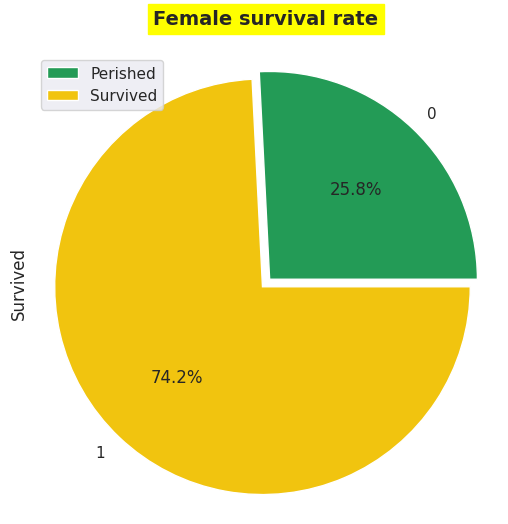

In [ ]:
colors = ['#239B56','#F1C40F']
Train_df[Train_df['Sex'] == 'female'].Survived.groupby(Train_df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Female survival rate", fontname="Times New Roman", size=14,fontweight="bold",backgroundcolor="yellow",pad=20)
plt.show()

**Conculsion**
* Male survival rate 18.9%
* Female survival rate 74.2%

* Females outlive males by 55.3%.

So we can conclude that females outlive males.











# **Analys Survival rate Age wise**

Text(0.5, 1.0, 'Survival rate')

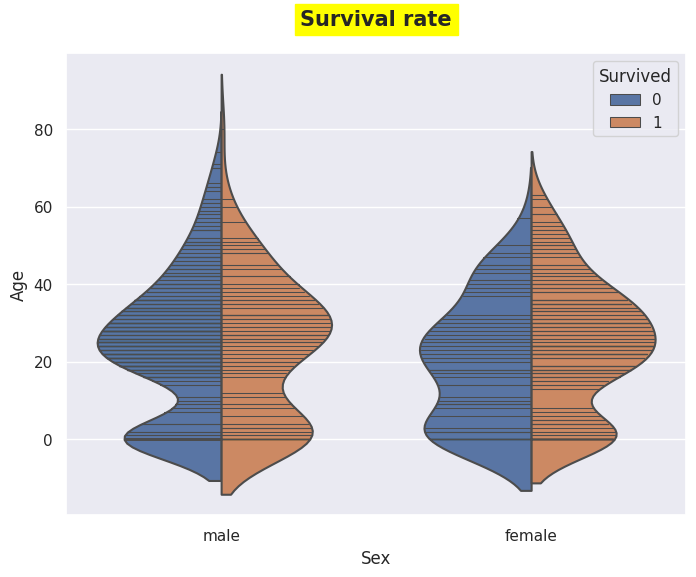

In [ ]:
plt.figure(figsize=(8, 6))
sns.set()
sns.violinplot(x='Sex', y='Age', hue='Survived', data=Train_df, split =True, inner = "stick");
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)



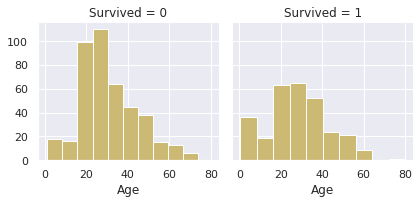

In [ ]:
E = sns.FacetGrid(Train_df, col='Survived')
E.map(plt.hist, 'Age', bins=10, color='y')




* Younger males are more likely to survive
* While a large number of passengers aged 20 to 40 perished
*Age does not appear to have a direct impact on female survival












# **Analysis Survival rate Pclass wise**




In [ ]:
Train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**According data -**


*  **In Pclass1**

     216 people stay
*   **In Pclass 2**

     184 people stay
*   **In Pclass 3**

     491 people stay






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival rate')

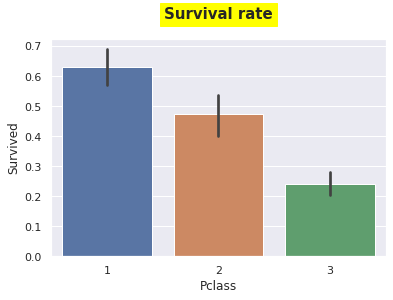

In [ ]:

sns.barplot('Pclass','Survived', data=Train_df)
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)

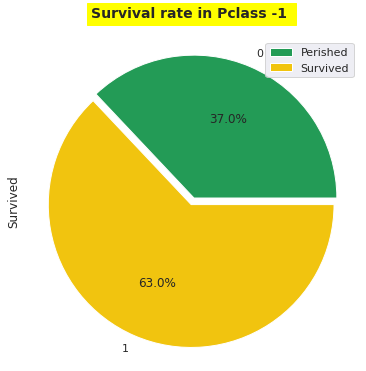

In [ ]:
colors = ['#239B56','#F1C40F']
Train_df[Train_df['Pclass'] == 1].Survived.groupby(Train_df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Survival rate in Pclass -1 ", fontname="Times New Roman", size=14,fontweight="bold",backgroundcolor="yellow",pad=20)
plt.show()


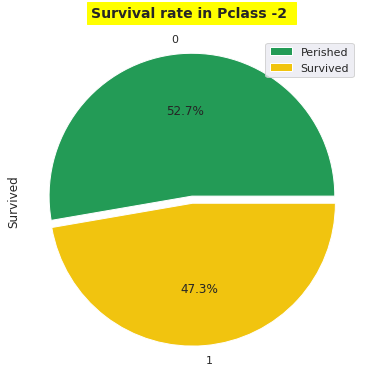

In [ ]:
colors = ['#239B56','#F1C40F']
Train_df[Train_df['Pclass'] == 2].Survived.groupby(Train_df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Survival rate in Pclass -2 ", fontname="Times New Roman", size=14,fontweight="bold",backgroundcolor="yellow",pad=20)
plt.show()

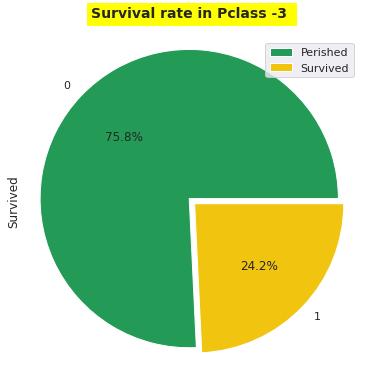

In [ ]:
colors = ['#239B56','#F1C40F']
Train_df[Train_df['Pclass'] == 3].Survived.groupby(Train_df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Survival rate in Pclass -3 ", fontname="Times New Roman", size=14,fontweight="bold",backgroundcolor="yellow",pad=20)
plt.show()

**Conculsion**

*   When compared to other Pclasses, Pclass 1 has a higher survival rate



In [ ]:
num_df1 = Train_df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin',]]

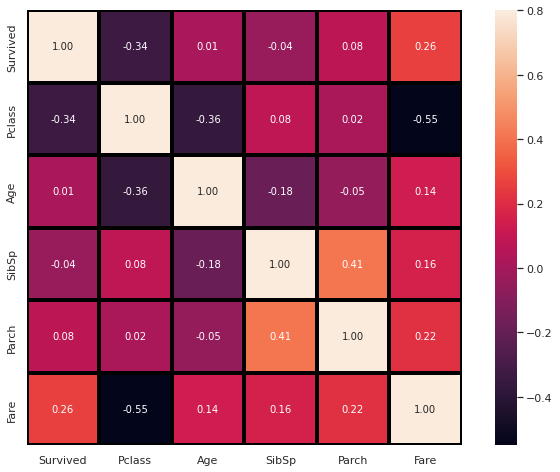

In [ ]:
corrmat = num_df1.corr()

f, ax = plt.subplots(figsize=(12,8))

# setting the parameter values
linewidths = 3
linecolor = "black"


# plotting the heatmap
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, linewidths=linewidths,linecolor=linecolor);

# displaying the plotted heatmap
plt.show()

# **Analyis Location wise**

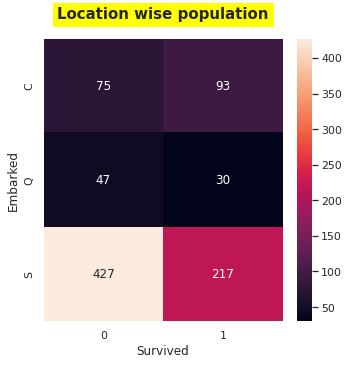

In [ ]:
fig, ax = plt.subplots( figsize=(5,5))
group = Train_df.groupby(['Embarked', 'Survived'])
pclass_survived = group.size().unstack()
ax.set_title("Location wise population", size=15,backgroundcolor='yellow', pad=20, fontweight ='bold', fontname ="Times new Roman")
fig.tight_layout()
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")



*   644 Pessengers from Southampton

*   77 Pessengers from Queenstown
*   168 Pessengers from Cherbourg



*   Remaining  from other location


# **Analyis risk Family_size and alone**





In [ ]:
 Train_df['Family_Size'].value_counts()

KeyError: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survival rate')

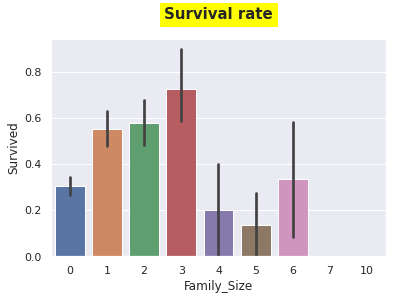

In [ ]:
sns.barplot('Family_Size','Survived', data=Train_df)
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Survival rate')

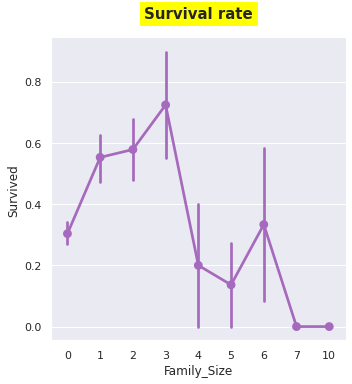

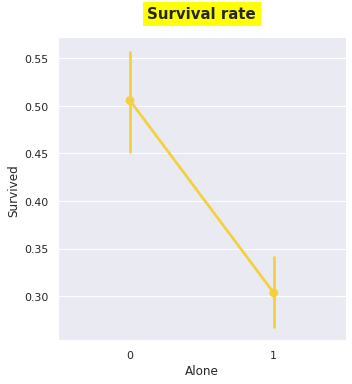

In [ ]:
# Adding a column Family_Size
Train_df['Family_Size'] = 0
Train_df['Family_Size'] = Train_df['Parch']+Train_df['SibSp']

# Adding a column Alone
Train_df['Alone'] = 0
Train_df.loc[Train_df.Family_Size == 0, 'Alone'] = 1
 # Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = Train_df, color='#A569BD')
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = Train_df,color='#F4D03F')
plt.title("Survival rate", fontsize =15, fontweight='bold',backgroundcolor = 'yellow',pad=20)


# **Conculsion**



*  When compared to other family sizes, famiy size 3 has a very high survival rate
* Pessengers who are alone have a low survival rate.



Total Popullation on ship - 891

Total Female - 314

Total Male - 577

Survive - 342

*   Female - 233 (74.2%)
*   Male - 109 (18.9%)

Perished - 549

*   Female - 81
*   Male - 468

When compared to other family sizes, the survivor rate of a family of three is quite high.

The majority of the passengers were from Southampton, while those from Cherbourg had a higher survival rate since most passengers pay a premium fare and stay in Pclass 1.















